In [1]:
from IPython.display import Audio
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# Storing the default figure size for reset
default_figsize = plt.rcParams["figure.figsize"]

### We can play audio in the browser

Let's start by generating an array of uniform floating point values (0,1) and play that array as a sound in the browser at a rate of 250 samples per second.

In [2]:
signal = np.random.random(750)
Audio(signal, rate=250)

## Read in WAV file

`scipy.io.wavfile` reads in the WAV file as a two-element tuple, which includes both the sampling frequency and the 2d numpy array of integer amplitudes.

In [3]:
original_wav = wavfile.read('sounds/sample.wav')
original_wav

(44100, array([[ 0,  0],
        [ 0,  0],
        [ 0,  0],
        ...,
        [ 0, -5],
        [-1, -5],
        [-1, -4]], dtype=int16))

In [4]:
original_wav[1].shape

(437760, 2)

#### Let's create some convenience variables

We'll only deal with the right channel for convenience

In [5]:
orig_array = original_wav[1][:,0].T
sampling_freq = original_wav[0]

In [6]:
Audio(orig_array, rate=sampling_freq)

#### Plot a slice of the waveform

When we plot part of the waveform, to zoom in we'll only display a small "slice" of the arrays. We can store this slice in a variable to make it easy to access repeatedly.

In [7]:
segment_range = slice(30000,32000)

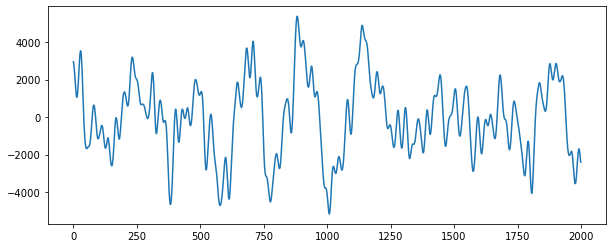

In [8]:
plt.rcParams["figure.figsize"] = [10,4]

orig_segment = orig_array[segment_range]
plt.plot(orig_segment)
plt.show()

## Triangle filter

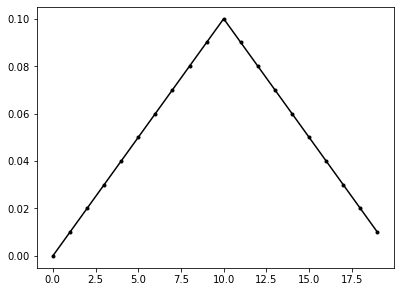

In [9]:
plt.rcParams["figure.figsize"] = default_figsize

# Create a waveform with a straight line ramp up then down
triangle_filter = np.append(np.arange(0,1,0.1), np.arange(1,0,-0.1))

# Normalize it so it's easier to compare the filtered and unfiltered waveforms
triangle_filter = triangle_filter / np.linalg.norm(triangle_filter, ord=1)

plt.plot(triangle_filter, 'k.-')
plt.show()

#### Perform the convolution to filter the audio

In [10]:
tri_filtered_array = np.convolve(orig_array, triangle_filter, mode="same")

#### Play the triangle filtered audio

In [11]:
Audio(tri_filtered_array, rate=sampling_freq)

#### Compare original and filtered waveforms

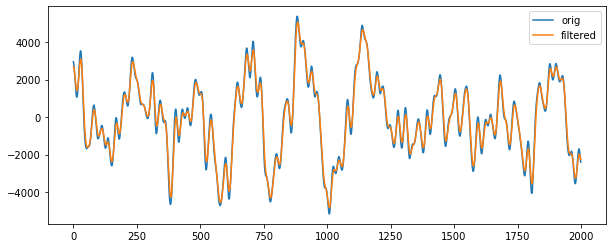

In [12]:
plt.rcParams["figure.figsize"] = [10,4]

plt.plot(np.vstack((orig_array[segment_range],tri_filtered_array[segment_range])).T)
plt.legend(['orig','filtered'], loc='upper right')
plt.show()

## Down-up-down (dud) filter

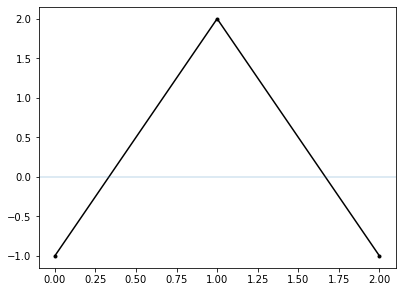

In [13]:
plt.rcParams["figure.figsize"] = default_figsize

dud_filter = np.array([-1, 2, -1])

plt.plot(dud_filter, 'k.-')
plt.axhline(0, alpha=0.2)
plt.show()

#### Perform the convolution to filter the audio

In [14]:
dud_filtered_array = np.convolve(orig_array, dud_filter, mode="same")

#### Play the triangle filtered audio

In [15]:
Audio(dud_filtered_array, rate=sampling_freq)

#### Compare original and filtered waveforms

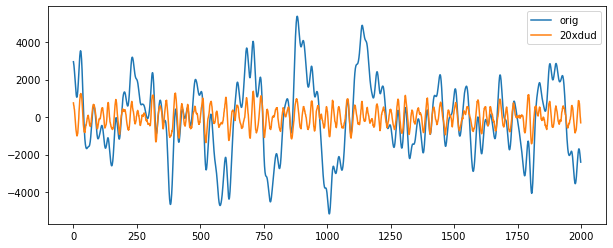

In [16]:
plt.rcParams["figure.figsize"] = [10,4]

plt.plot(np.vstack((orig_array[segment_range],20*dud_filtered_array[segment_range])).T)
plt.legend(['orig','20xdud'], loc='upper right')
plt.show()

## Severe Down-up-down (sevdud) filter

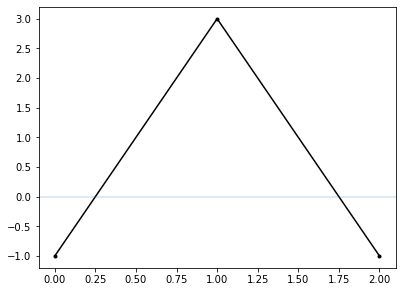

In [17]:
plt.rcParams["figure.figsize"] = default_figsize

sevdud_filter = np.array([-1, 3, -1])

plt.plot(sevdud_filter, 'k.-')
plt.axhline(0, alpha=0.2)
plt.show()

#### Perform the convolution to filter the audio

In [18]:
sevdud_filtered_array = np.convolve(orig_array, sevdud_filter, mode="same")

#### Play the triangle filtered audio

In [19]:
Audio(sevdud_filtered_array, rate=sampling_freq)

#### Compare original and filtered waveforms

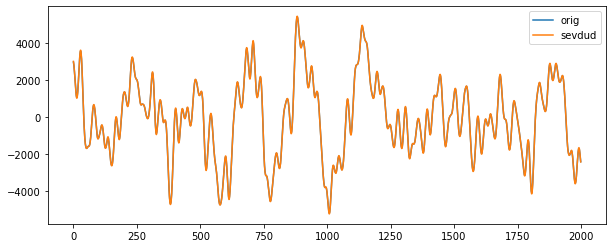

In [20]:
plt.rcParams["figure.figsize"] = [10,4]

plt.plot(np.vstack((orig_array[segment_range],sevdud_filtered_array[segment_range])).T)
plt.legend(['orig','sevdud'], loc='upper right')
plt.show()

## Beginning-end impulse filter

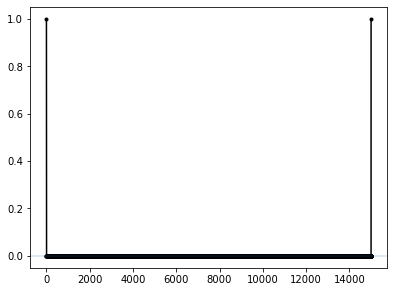

In [21]:
plt.rcParams["figure.figsize"] = default_figsize

impulse_filter = np.concatenate(([1], np.zeros(15000), [1]))

plt.plot(impulse_filter, 'k.-')
plt.axhline(0, alpha=0.2)
plt.show()

#### Perform the convolution to filter the audio

Direct convolution using `np.convolve()` takes a really long time with these arrays. Scipy convolution has an option for FFT-based convolution and by default automatically decides on the mode based on an esimate of how long it should take for each.

In [22]:
from scipy.signal import convolve

impulse_filtered_array = convolve(orig_array, impulse_filter, mode="same")

#### Play the triangle filtered audio

In [23]:
Audio(impulse_filtered_array, rate=sampling_freq)

#### Compare original and filtered waveforms

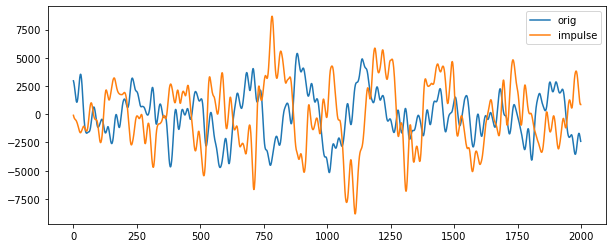

In [24]:
plt.rcParams["figure.figsize"] = [10,4]

plt.plot(np.vstack((orig_array[segment_range],impulse_filtered_array[segment_range])).T)
plt.legend(['orig','impulse'], loc='upper right')
plt.show()